In [1]:
from FinancialMachineLearning.generator.stochasticprocess import *

In [2]:
stochastic = GeometricBrownianMotion(mu = 0, sigma = 0.028, 
                                          n_paths = 1, n_steps = 10000, 
                                          start = 10, end = 252, initial_price = 1000)

In [3]:
simulation = stochastic.simulate()

In [4]:
simulation

,0
2023-09-20 16:03:39.748202,1000.000000
2023-09-21 16:03:39.748202,996.708859
2023-09-22 16:03:39.748202,991.486837
2023-09-25 16:03:39.748202,983.864861
2023-09-26 16:03:39.748202,996.246676
...,...
2062-01-12 16:03:39.748202,2271.867557
2062-01-13 16:03:39.748202,2286.955403
2062-01-16 16:03:39.748202,2287.320512
2062-01-17 16:03:39.748202,2303.299912


<Axes: >

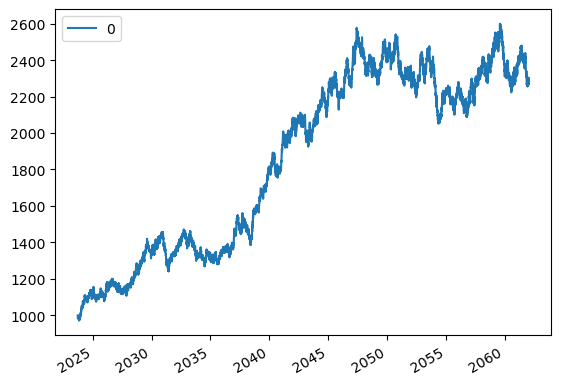

In [5]:
simulation.plot()

In [6]:
from FinancialMachineLearning.features.fracdiff import *

In [7]:
simulation.columns = ['close']

In [8]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

cols = ['adfStat','pVal','lags','nObs','95% conf', 'corr']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0, 1, 11):
    try:
        df1 = np.log(simulation).dropna()
        df2 = FractionalDifferentiatedFeatures.fracDiff(df1, d = d, thres = 1e-5)
        corr = np.corrcoef(df1.loc[df2.index,'close'], df2['close'])[0,1]
        df2 = sm.tsa.stattools.adfuller(df2['close'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue

d: 0.1, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors


,adfStat,pVal,lags,nObs,95% conf,corr
0.0,-1.923484,3.210954e-01,1.0,9998.0,-2.861829,1.000000
0.2,-1.299496,6.294031e-01,1.0,4.0,-4.474365,0.963074
0.3,-1.611661,4.771036e-01,1.0,11.0,-3.189369,0.942619
0.4,-3.005834,3.435315e-02,1.0,27.0,-2.976430,0.917076
0.5,-3.973270,1.557127e-03,1.0,68.0,-2.905087,0.111684
0.6,-6.168027,6.913453e-08,1.0,180.0,-2.877735,0.511436
0.7,-11.833555,7.887231e-22,1.0,513.0,-2.867190,0.303421
0.8,-22.933642,0.000000e+00,1.0,1559.0,-2.863396,0.119479
0.9,-44.019574,0.000000e+00,1.0,4653.0,-2.862161,0.072295
1.0,-71.483101,0.000000e+00,1.0,9997.0,-2.861829,-0.003220


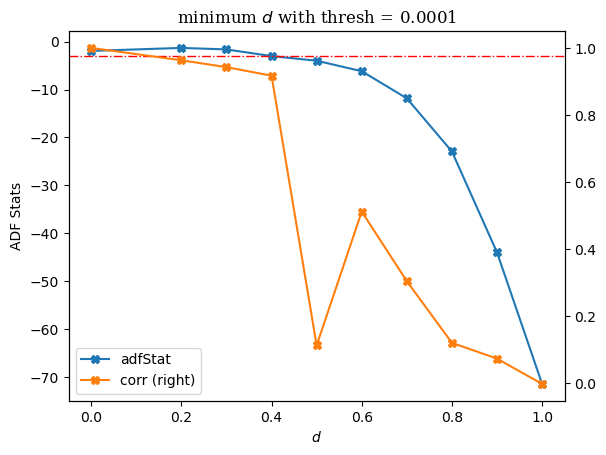

In [9]:
import matplotlib.pyplot as plt
f,ax = plt.subplots()
out[['adfStat', 'corr']].plot(ax = ax, marker = 'X', secondary_y = 'corr')
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = '-.')
ax.set_title(r'minimum $d$ with thresh = 0.0001', fontfamily = 'Serif', fontsize = 12)
ax.set_xlabel(r'$d$')
ax.set_ylabel('ADF Stats');
display(out)

In [19]:
fracdiff = FractionalDifferentiatedFeatures.fracDiff_FFD(simulation, 0.5)

<Axes: >

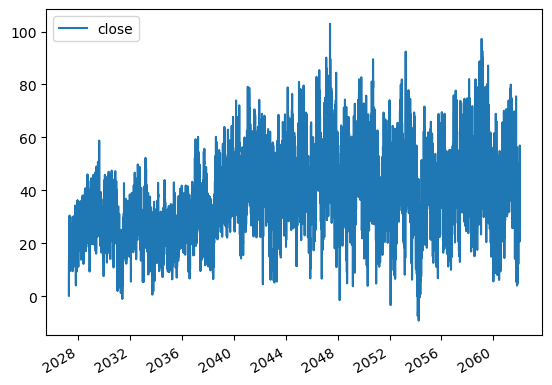

In [20]:
fracdiff.plot()

In [21]:
from FinancialMachineLearning.features.entropy import *
cont_etp = ContinuousEntropy(ret = fracdiff, period = 50)

In [22]:
apen = cont_etp.continuous_entropy()

<Axes: >

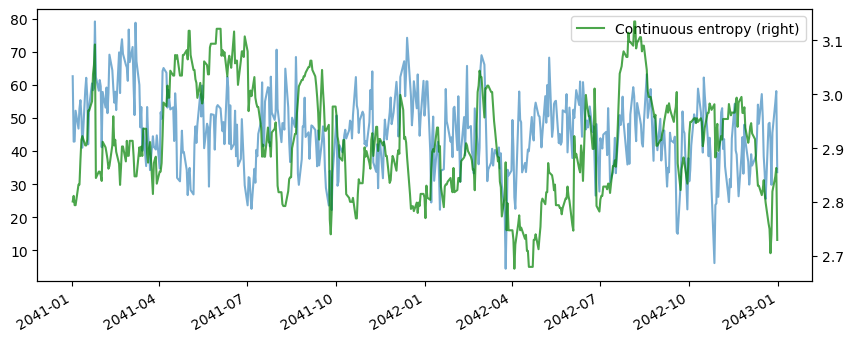

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(fracdiff.loc['2041' : '2042'], alpha = 0.6)
apen.loc['2041' : '2042'].plot(secondary_y = True, ax = ax, alpha = 0.7, color = 'green')

#### Discrete Entropy

In [24]:
fracdiff

,close
2027-04-08 16:03:39.748202,13.259389
2027-04-09 16:03:39.748202,0.009889
2027-04-12 16:03:39.748202,17.626533
2027-04-13 16:03:39.748202,15.603626
2027-04-14 16:03:39.748202,15.008883
...,...
2062-01-12 16:03:39.748202,35.668400
2062-01-13 16:03:39.748202,50.203543
2062-01-16 16:03:39.748202,42.983870
2062-01-17 16:03:39.748202,56.932191


In [25]:
quantile = pd.qcut(fracdiff.close, q = 10, labels = range(10))
quantile

2027-04-08 16:03:39.748202    0
2027-04-09 16:03:39.748202    0
2027-04-12 16:03:39.748202    0
2027-04-13 16:03:39.748202    0
2027-04-14 16:03:39.748202    0
                             ..
2062-01-12 16:03:39.748202    4
2062-01-13 16:03:39.748202    7
2062-01-16 16:03:39.748202    6
2062-01-17 16:03:39.748202    8
2062-01-18 16:03:39.748202    1
Name: close, Length: 9075, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [26]:
message = ''.join(map(str, quantile.values))
message

'000001111023230010010011010110000000000200000001222102020111011000010100003222000111011211222220130111012112120100001111001101234222323311000000000000000010132212200322323142234300002120211000001124334332212120011112312320011101110224422002113100003232221113232323335313321314500121111014311001021112003323221222134333353345455344311510101011121143214333331444345655653523647654244324154421155311121042253334100000010010134310122111113442564322315453255565342302111243222223124232425464324333711333554334321336665301543243246667565343111011321213020221475476744212654745535331453436566763343326656655535446466696554345441331123345433321022233531222133243100221111332311222232420311212222413110100100321121151201266255443325537212335454333553223202342240100432210201011022211256445655645210101343446767656314324345432000123214210221121143112325244422456422366675765236555444433423112014113526355344202246346563524442534353344545431135764143333234312345465314235554422221002310000110010002301024300010

In [27]:
etp = []
for i in range(100, len(message)) :
    etp.append(konto_entropy(message[i-100:i]))
etp = pd.DataFrame(etp, columns = ['Konto Entropy'], index = quantile.index[100:])
etp

,Konto Entropy
2027-08-26 16:03:39.748202,1.342589
2027-08-27 16:03:39.748202,1.333141
2027-08-30 16:03:39.748202,1.324885
2027-08-31 16:03:39.748202,1.325443
2027-09-01 16:03:39.748202,1.326326
...,...
2062-01-12 16:03:39.748202,2.318464
2062-01-13 16:03:39.748202,2.296434
2062-01-16 16:03:39.748202,2.304261
2062-01-17 16:03:39.748202,2.256631


Text(0.5, 1.0, 'Entropy with Geometric Brownian Motion')

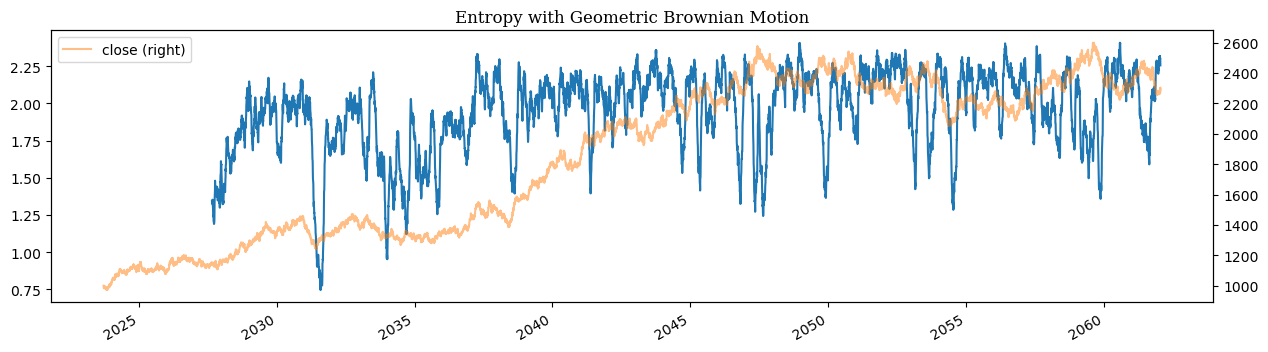

In [31]:
fig, ax = plt.subplots(figsize = (15, 4))
ax.plot(etp)
simulation.plot(secondary_y = True, ax = ax, alpha = 0.5)
plt.title('Entropy with Geometric Brownian Motion', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'Entropy with Geometric Brownian Motion (window = 50)')

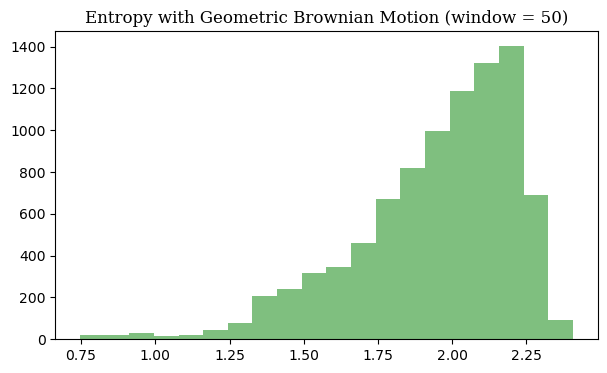

In [32]:
plt.figure(figsize = (7,4))
plt.hist(etp, bins = 20, color = 'g', alpha = 0.5)
plt.title('Entropy with Geometric Brownian Motion (window = 50)', fontsize = 12, fontfamily = 'Serif')